<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_3_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 3: Association Rules - Apriori using **efficient-apriori** api
# 21130429 - Phạm Tiến Lộc


---



# Import libraries

In [102]:
!pip install efficient-apriori

In [108]:
!pip install mlxtend

In [120]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from efficient_apriori import apriori
from datetime import datetime
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [110]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/data


#Task 1. Apply Apriori algorithm to **dataset1** with 5 transactions from a set of items {Bread, Milk, Diaper, Beer, Coke}

#Task 1.1. Prepare dataset (load transactions from dataset1.csv and preprocess them)

In [111]:
#code
ds1 = pd.read_csv('dataset1.csv')
transactions = [transaction.replace(',', '').split() for transaction in ds1['Items']]
print(transactions)

[['Bread', 'Milk'], ['Bread', 'Diaper', 'Beer', 'Eggs'], ['Milk', 'Diaper', 'Beer', 'Coke'], ['Bread', 'Milk', 'Diaper', 'Beer'], ['Bread', 'Milk', 'Diaper', 'Coke']]


#Task 1.2. Apply Apriori to the preprocessed dataset with min_supp = 50% and min_conf = 50%

In [114]:
#code
itemsets, rules = apriori(transactions, min_support=0.5, min_confidence=0.5)
print(rules)
print(itemsets)

[{Diaper} -> {Beer}, {Beer} -> {Diaper}, {Diaper} -> {Bread}, {Bread} -> {Diaper}, {Milk} -> {Bread}, {Bread} -> {Milk}, {Milk} -> {Diaper}, {Diaper} -> {Milk}]
{1: {('Bread',): 4, ('Milk',): 4, ('Diaper',): 4, ('Beer',): 3}, 2: {('Beer', 'Diaper'): 3, ('Bread', 'Diaper'): 3, ('Bread', 'Milk'): 3, ('Diaper', 'Milk'): 3}}


#Task 1.3. Report association rules obtained from Task 1.2 (include their support, confidence, and lift)

In [115]:
#code
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{Diaper} -> {Bread} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Bread} -> {Diaper} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Milk} -> {Bread} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Bread} -> {Milk} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Milk} -> {Diaper} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Diaper} -> {Milk} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Diaper} -> {Beer} (conf: 0.750, supp: 0.600, lift: 1.250, conv: 1.600)
{Beer} -> {Diaper} (conf: 1.000, supp: 0.600, lift: 1.250, conv: 200000000.000)


#Task 2. Apply Apriori algorithm to **dataset2** with transactions from a set of 20 items

#Task 2.1. Prepare dataset (load transactions from dataset2.csv and preprocess them)

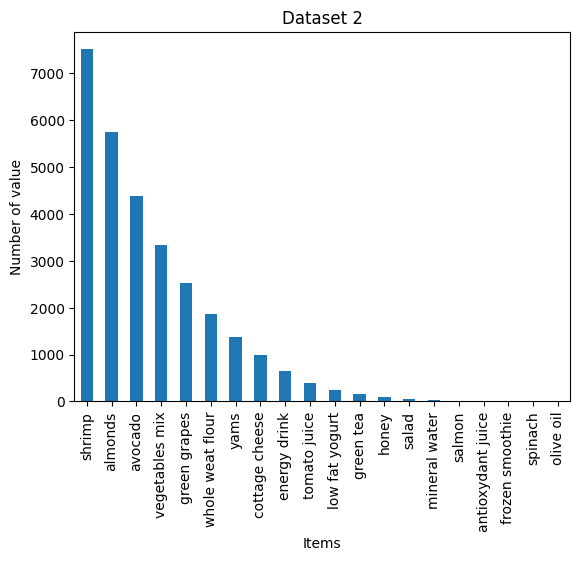

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice
0,burgers,meatballs,eggs,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
1,chutney,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
2,turkey,avocado,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
3,mineral water,milk,energy bar,whole wheat rice,green tea,french fries,green tea,green tea,green tea,green tea
4,low fat yogurt,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,green tea,green tea,green tea,green tea
7497,chicken,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
7498,escalope,green tea,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea


In [116]:
#code
ds2 = pd.read_csv('dataset2.csv')
ds2.count().plot(kind='bar')
plt.title('Dataset 2')
plt.xlabel("Items")
plt.ylabel("Number of value")
plt.show()
ds2.drop(ds2.iloc[:, 10:20], inplace=True, axis=1)
for column in ds2.columns:
  ds2.fillna({column: ds2[column].mode()[0]}, inplace=True)
ds2

#Task 2.2. Apply Apriori to the preprocessed dataset with min_supp = 50% and min_conf = 50% (*modify min_supp and min_conf if proposed values are not appropriate*)

In [117]:
#code
transactions = []
for i, row in ds2.iterrows():
  transaction = []
  for item in row:
    transaction.extend(item.split(", "))
  transactions.append(transaction)

itemsets, rules = apriori(transactions, min_support=0.5, min_confidence=0.5)
print(rules)
print(itemsets)

[{green tea} -> {french fries}, {french fries} -> {green tea}, {mineral water} -> {french fries}, {french fries} -> {mineral water}, {mineral water} -> {green tea}, {green tea} -> {mineral water}, {green tea, mineral water} -> {french fries}, {french fries, mineral water} -> {green tea}, {french fries, green tea} -> {mineral water}, {mineral water} -> {french fries, green tea}, {green tea} -> {french fries, mineral water}, {french fries} -> {green tea, mineral water}]
{1: {('mineral water',): 5468, ('green tea',): 7162, ('french fries',): 6115}, 2: {('french fries', 'green tea'): 6038, ('french fries', 'mineral water'): 4763, ('green tea', 'mineral water'): 5274}, 3: {('french fries', 'green tea', 'mineral water'): 4726}}


#Task 2.3. Report association rules obtained from Task 2.2 (include their **support**, **confidence**, and **lift**)

In [118]:
#code
for rule in sorted(rules, key=lambda rule: rule.lift):
    print(rule)

{mineral water} -> {green tea} (conf: 0.965, supp: 0.703, lift: 1.010, conv: 1.270)
{green tea} -> {mineral water} (conf: 0.736, supp: 0.703, lift: 1.010, conv: 1.028)
{green tea} -> {french fries} (conf: 0.843, supp: 0.805, lift: 1.034, conv: 1.177)
{french fries} -> {green tea} (conf: 0.987, supp: 0.805, lift: 1.034, conv: 3.579)
{french fries, mineral water} -> {green tea} (conf: 0.992, supp: 0.630, lift: 1.039, conv: 5.801)
{green tea} -> {french fries, mineral water} (conf: 0.660, supp: 0.630, lift: 1.039, conv: 1.073)
{mineral water} -> {french fries} (conf: 0.871, supp: 0.635, lift: 1.068, conv: 1.432)
{french fries} -> {mineral water} (conf: 0.779, supp: 0.635, lift: 1.068, conv: 1.225)
{french fries, green tea} -> {mineral water} (conf: 0.783, supp: 0.630, lift: 1.074, conv: 1.247)
{mineral water} -> {french fries, green tea} (conf: 0.864, supp: 0.630, lift: 1.074, conv: 1.437)
{green tea, mineral water} -> {french fries} (conf: 0.896, supp: 0.630, lift: 1.099, conv: 1.777)
{f

#Task 2.4. Apply Apriori with different values of support and plot the running time

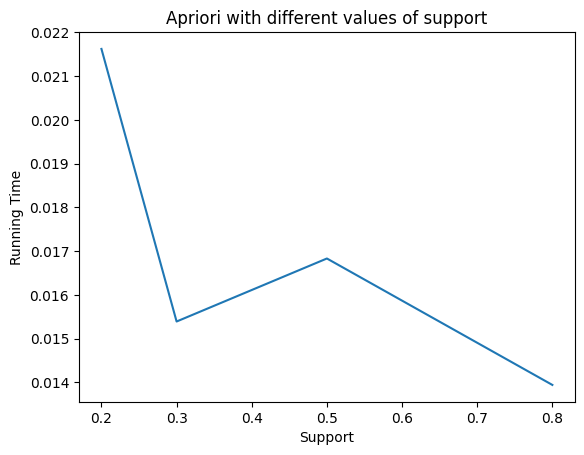

In [119]:
#code
supp_param = [0.2, 0.3, 0.5, 0.8]
run_times = []
for supp in supp_param:
  bt = datetime.now()
  itemsets, rules = apriori(transactions, min_support=supp, min_confidence = 0.5)
  et = datetime.now()
  run_times.append((et-bt).total_seconds())

plt.plot(supp_param, run_times)
plt.title('Apriori with different values of support')
plt.xlabel('Support')
plt.ylabel('Running Time')
plt.show()

#Task 3. Apply **Apriori** to dataset 3 using **mlxtend** API
The dataset contains 435 voting records on 16 different features ranged from education to defense. The main objective of the task is to use association mining to find the combination of attributes has the highest confidence with either republican or democrat

#Task 3.1. Preprocessing dataset, plot the missing rate for each attribute. Then, remove the high missing attributes (?: missing). Other missing values will be imputed by 'y'

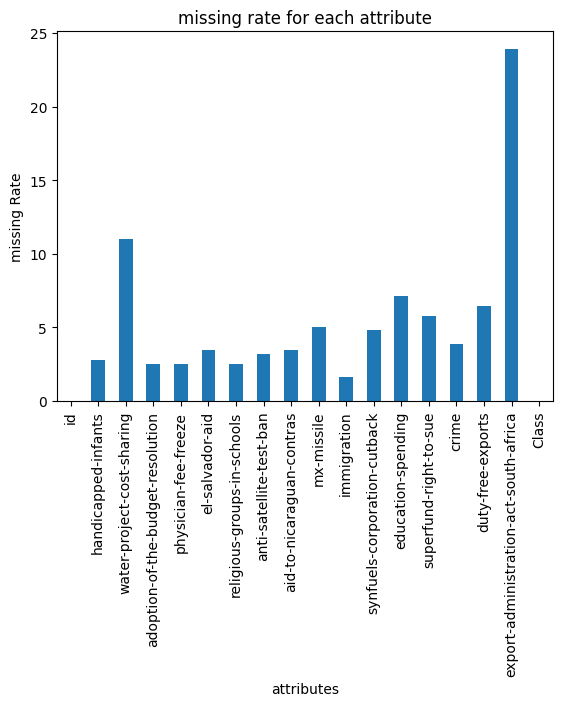

<ipython-input-121-95cd9f22b4eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna('y', inplace=True)


In [121]:
#code
ds3 = pd.read_csv('dataset3.csv')
data = ds3.dropna()
missing_rate = (data == '?').mean() * 100
missing_rate.plot(kind='bar')
plt.title('missing rate for each attribute')
plt.xlabel('attributes')
plt.ylabel('missing Rate')
plt.show()

# remove the high missing attributes
data = data.loc[:, missing_rate < 10]

# missing values will be imputed by 'y'
data.fillna('y', inplace=True)

#Task 3.2. Convert **Class** attribute to 2 columns based on its values (republican, democrat).

In [122]:
#code
data = pd.get_dummies(data, columns=['Class'], prefix='', prefix_sep='', drop_first=False)
data.replace({True: 'y', False: 'n'}, inplace=True)
data

,id,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,democrat,republican
0,1,n,n,y,y,y,n,n,n,y,?,y,y,y,n,n,y
1,2,n,n,y,y,y,n,n,n,n,n,y,y,y,n,n,y
2,3,?,y,?,y,y,n,n,n,n,y,n,y,y,n,y,n
3,4,n,y,n,?,y,n,n,n,n,y,n,y,n,n,y,n
4,5,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,431,n,y,y,y,y,n,n,y,y,n,y,y,y,n,n,y
431,432,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,n
432,433,n,n,y,y,y,n,n,n,n,y,y,y,y,n,n,y
433,434,n,n,y,y,y,?,?,?,?,n,y,y,y,n,n,y


#Task 3.3. Drop unnecessary columns from the dataset(Class, id)

In [ ]:
#code
data.drop(columns=['id'], inplace=True)

#Task 3.4. Apply Apriori to the preprocessed dataset using **mlxtend** using your min_supp and min_conf.

In [ ]:
#code
print(data)
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
data = pd.DataFrame(a_data, columns=a.columns_)
# data
# itemsets = apriori(data, min_support=0.3, use_colnames=True)
# itemsets

#Task 3.5. Report the rules obtained from the Task 3.4.

In [ ]:
#code

#Task 3.6. Filter all rules X => Y with Y belonging to {**republican**, **democrat**}

In [ ]:
#code